# EDA analysis.
## Net load on a weekly resolution. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
# import matplotlib.font_manager

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)

COLOR_SUMMER = '#f9da21'
COLOR_WINTER = '#70b2b2'
COLOR_AUTUMN  = '#9e9e9e'
COLOR_SPRING = '#97be6d'

cmaps_hex = [COLOR_SPRING,COLOR_SUMMER,COLOR_AUTUMN,COLOR_WINTER]
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
RSEED = 42

In [3]:
# # Load data for building 5
# building_nr = 5
# df = pd.read_csv(f"../data/preprocessed/Building_{building_nr}.csv").astype({'datetime': 'datetime64'})#.set_index('datetime')


In [4]:
building = "All"
# Load data
df = pd.read_csv(f"../data/preprocessed/Agg_buildings.csv").astype({'datetime': 'datetime64'})#.set_index('datetime')

In [5]:
data_df = df.assign(
    timestamp = lambda x: pd.to_datetime(x['datetime']), 
    date = lambda x: x['timestamp'].dt.date,
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    weekofyear = lambda x: x['timestamp'].dt.weekofyear,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear,
    hour = lambda x: x['timestamp'].dt.hour,
)
weekly_data_df = data_df\
    .groupby(['date','year','month','weekofyear','day','dayofyear'], as_index=False)\
    .agg({'net_load_kW':np.mean})\
    .set_index('date')

/var/folders/8t/vxvv0wfd7q7_yj7gmh717sww0000gn/T/ipykernel_3932/2695931280.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekofyear = lambda x: x['timestamp'].dt.weekofyear,


In [6]:
season = list(np.repeat(['Winter','Spring','Summer','Autumn'],3))
season.append(season.pop(0))
# df_season = pd.DataFrame({'season':season, 'month':[month%12 // 3 + 1 for month in range(1, 13)]}, index=range(12))
df_season = pd.DataFrame({'season':season, 'month':range(1,13)}, index=range(12))
data_df = pd.merge(data_df, df_season, how='left', on='month')

In [7]:
# data_df['season1'] = pd.Categorical.from_codes((data_df.month-1)//3, ['Winter','Spring','Summer','Autumn'])

In [8]:
# df_winter1 = data_df[(data_df['season']=='Winter') & (data_df['weekofyear']< 20)].set_index('weekofyear')['net_load_kW'].rolling(24,center=True, min_periods=1).mean()
# df_spring = data_df[(data_df['season']=='Spring') & (data_df['weekofyear']< 30)].set_index('weekofyear')['net_load_kW'].rolling(24, center=True, min_periods=1).mean()
# df_summer = data_df[(data_df['season']=='Summer') & (data_df['weekofyear']< 40)].set_index('weekofyear')['net_load_kW'].rolling(24, center=True, min_periods=1).mean()
# df_autumn = data_df[(data_df['season']=='Autumn') & (data_df['weekofyear']< 50)].set_index('weekofyear')['net_load_kW'].rolling(24, center=True, min_periods=1).mean()
# df_winter2 = data_df[(data_df['season']=='Winter') & (data_df['weekofyear']>40)].set_index('weekofyear')['net_load_kW'].rolling(24, center=True, min_periods=1).mean()


In [9]:
# from matplotlib.pyplot import legend


# fig, ax = plt.subplots()
# ax = sns.lineplot(data = pd.DataFrame(df_winter1).rename(columns={'net_load_kWh':'Winter'}), palette=[COLOR_WINTER], ci ='sd')
# ax = sns.lineplot(data = pd.DataFrame(df_spring).rename(columns={'net_load_kWh':'Spring'}), palette=[COLOR_SPRING], ci = 'sd')
# ax = sns.lineplot(data = pd.DataFrame(df_summer).rename(columns={'net_load_kWh':'Summer'}), palette=[COLOR_SUMMER], ci = 'sd')
# ax = sns.lineplot(data = pd.DataFrame(df_autumn).rename(columns={'net_load_kWh':'Autumn'}), palette=[COLOR_AUTUMN], ci = 'sd')
# ax = sns.lineplot(data = pd.DataFrame(df_winter2).rename(columns={'net_load_kWh':'Winter'}), palette=[COLOR_WINTER], ci = 'sd')
# ax.set(title = 'Energy Net Usage by Week of the Year', xlabel='Week of the year', ylabel='kWh')
# ax.set_ylim(-1,60)
# handles, labels = ax.get_legend_handles_labels()
# plt.legend([handles[index] for index in [3,1,2,0]], [labels[index] for index in [3,1,2,0]], bbox_to_anchor=(1, 0.5), loc='center left')
# fig.savefig('../images/energy_net_usage_by_weekyear.png', dpi=450, bbox_inches='tight')

In [10]:
# from matplotlib.pyplot import legend


# fig, ax = plt.subplots()
# ax = sns.lineplot(data = pd.DataFrame(df_winter1).rename(columns={'outdoor_temp':'Winter'}), palette=[COLOR_WINTER], ci ='sd')
# ax = sns.lineplot(data = pd.DataFrame(df_spring).rename(columns={'outdoor_temp':'Spring'}), palette=[COLOR_SPRING], ci = 'sd')
# ax = sns.lineplot(data = pd.DataFrame(df_summer).rename(columns={'outdoor_temp':'Summer'}), palette=[COLOR_SUMMER], ci = 'sd')
# ax = sns.lineplot(data = pd.DataFrame(df_autumn).rename(columns={'outdoor_temp':'Autumn'}), palette=[COLOR_AUTUMN], ci = 'sd')
# ax = sns.lineplot(data = pd.DataFrame(df_winter2).rename(columns={'outdoor_temp':'Winter'}), palette=[COLOR_WINTER], ci = 'sd')
# ax.set(title = 'Outside temp', xlabel='Week of the year', ylabel='kWh')
# ax.set_ylim(0,40)
# handles, labels = ax.get_legend_handles_labels()
# plt.legend([handles[index] for index in [3,1,2,0]], [labels[index] for index in [3,1,2,0]], bbox_to_anchor=(1, 0.5), loc='center left')
# #fig.savefig('../images/energy_net_usage_by_weekyear.png', dpi=450, bbox_inches='tight')

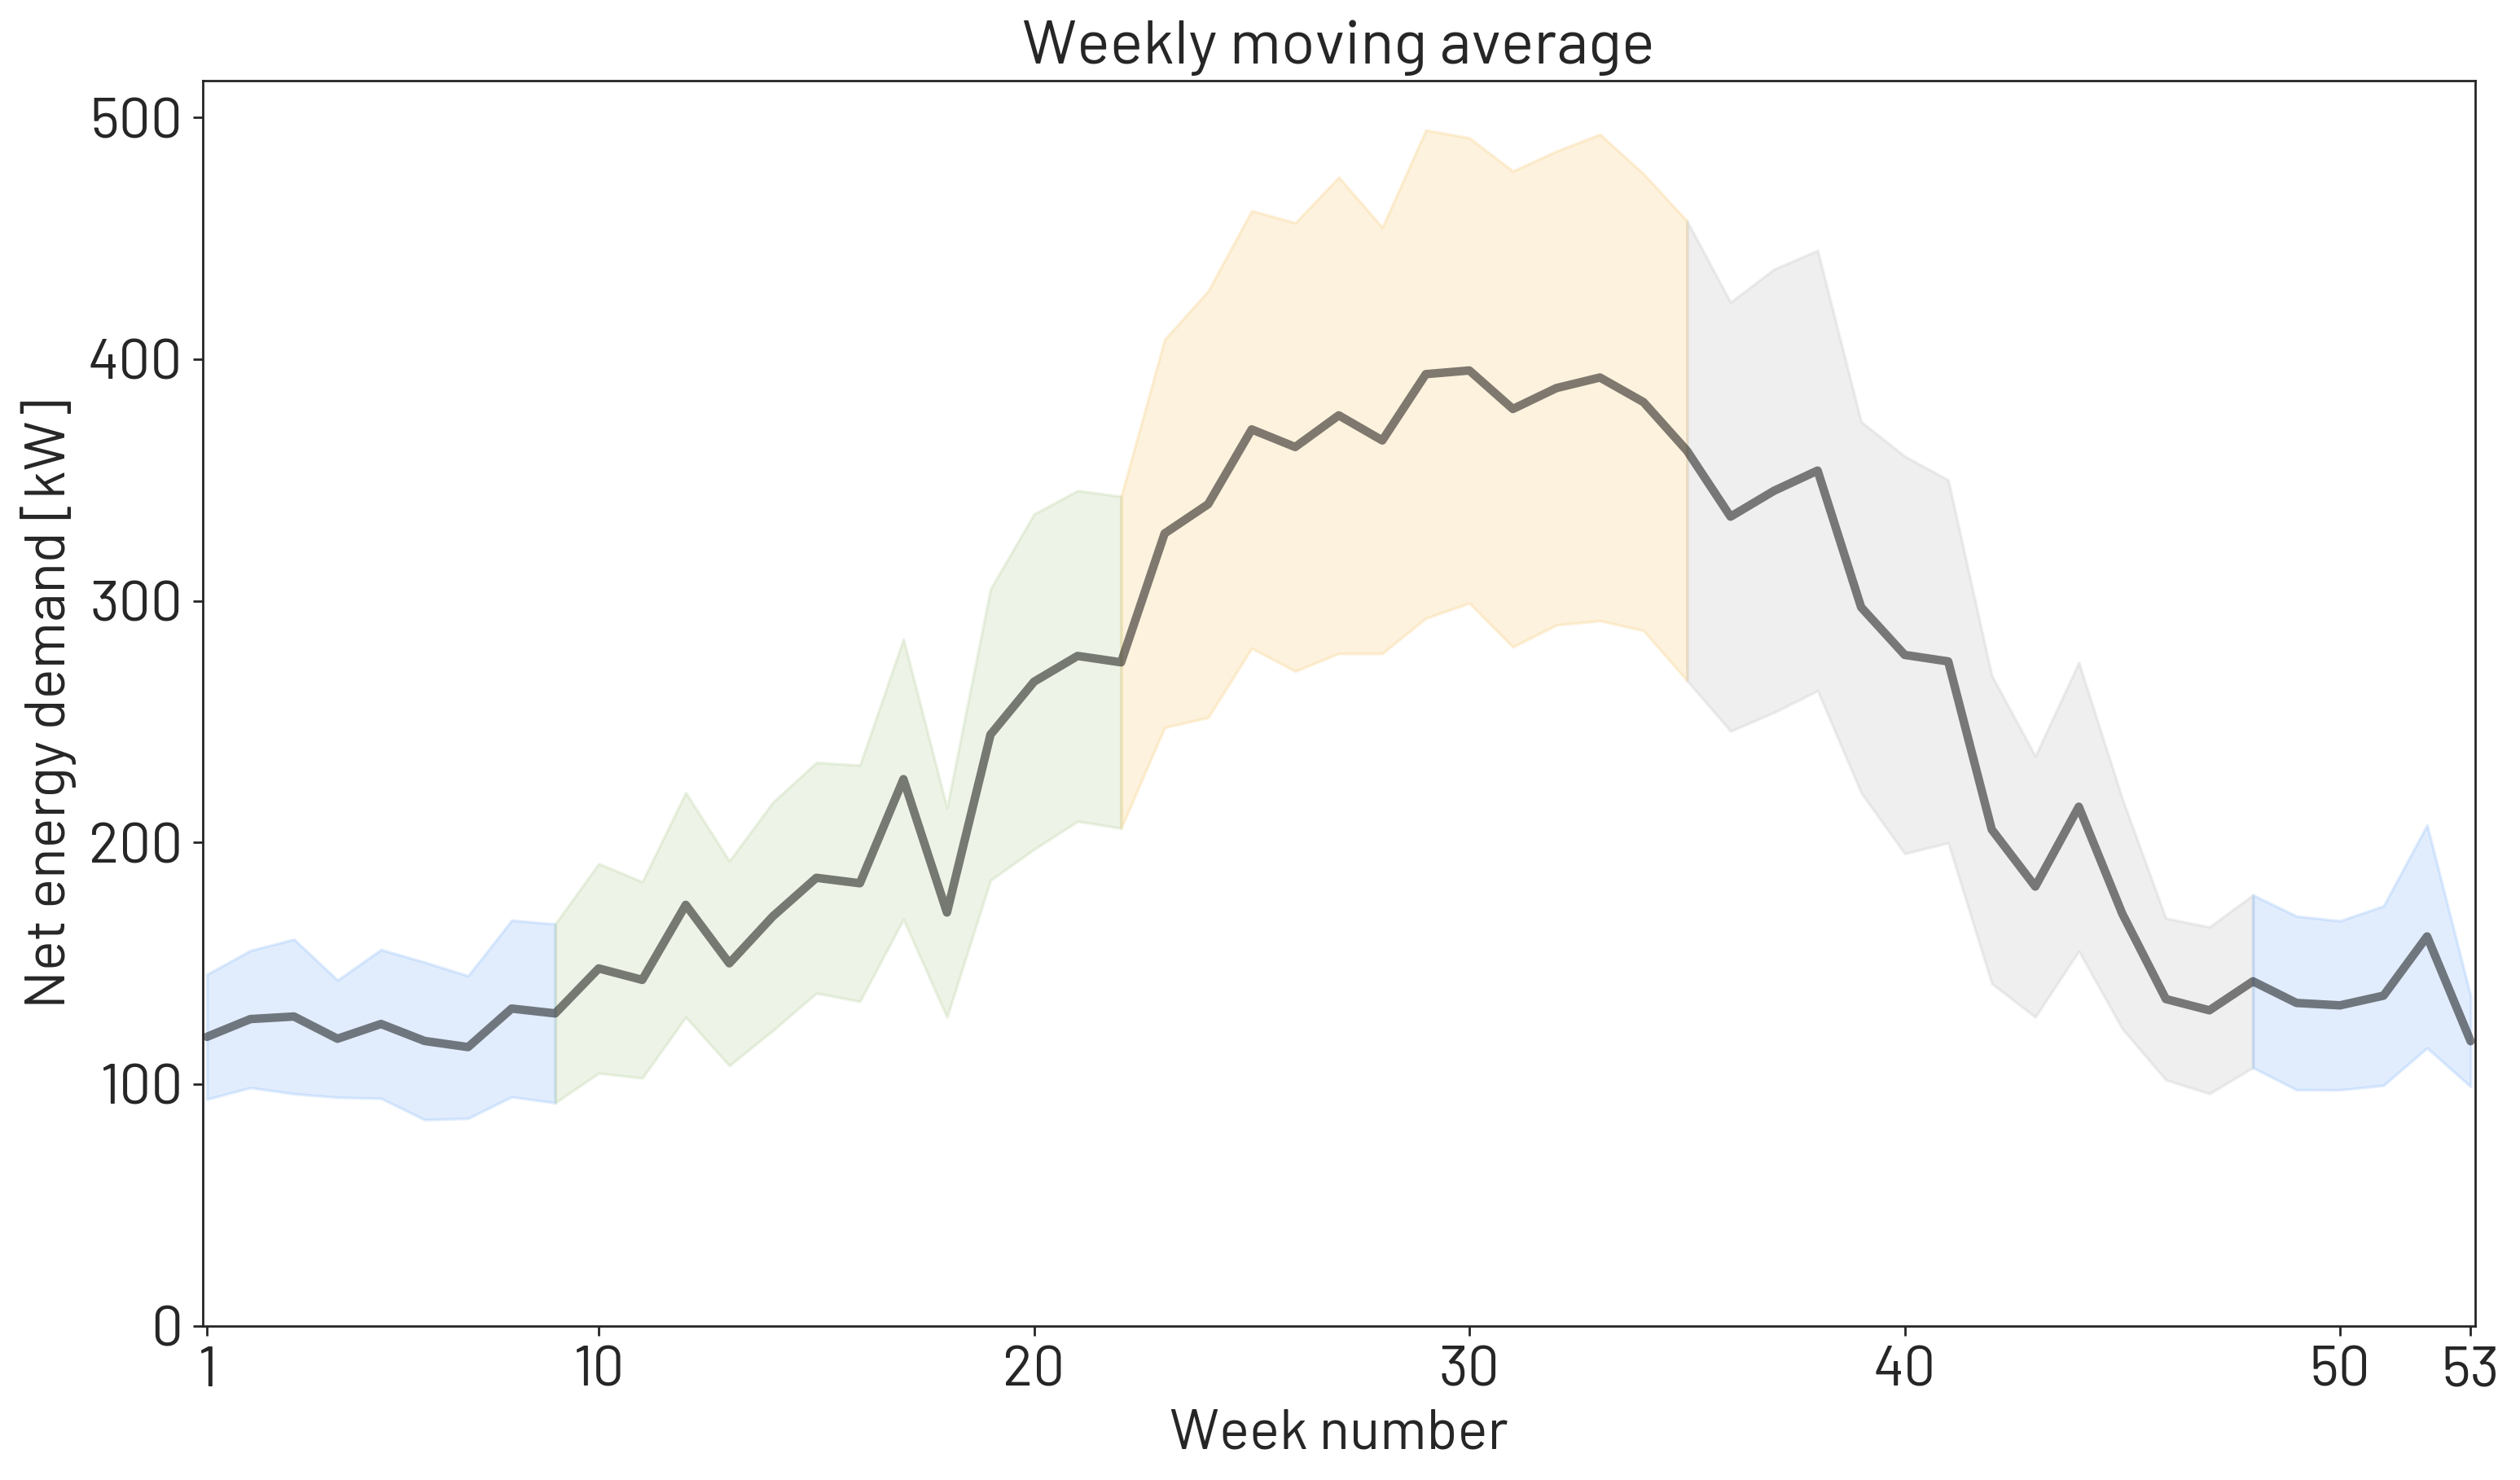

In [11]:
from matplotlib.colors import to_rgba
import matplotlib.ticker as tick

sns.axes_style()
# sns.set(font="Arial")
sns.set_style('white')
font_size=20
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Barlow']


data_df = data_df.assign(
    in_winter_1 = lambda x: np.logical_and(x['season']=='Winter', x["weekofyear"]<20),
    in_spring = lambda x: x['season']=='Spring',
    in_summer = lambda x: x['season']=='Summer',
    in_autumn = lambda x: x['season']=='Autumn',
    in_winter_2 = lambda x: np.logical_and(x['season']=='Winter', x["weekofyear"]>20),
);

fig, ax = plt.subplots()
fig.set_figwidth(16*.9)
fig.set_figheight(9*.9)
fig.set_dpi(250)

weekofyear_g = data_df.groupby("weekofyear")
m = weekofyear_g.mean()['net_load_kW']
md = weekofyear_g.median()['net_load_kW']
s = weekofyear_g.std()['net_load_kW']

season_columns = [
    'in_winter_1',
    'in_spring',
    'in_summer',
    'in_autumn',
    'in_winter_2']
seasons = weekofyear_g.mean()[season_columns]

#rollingweek_g = data_df.rolling(24*7, center=True, min_periods=1)
#m_r = rollingweek_g.mean()['net_load_kWh']
#s_r = rollingweek_g.std()['net_load_kWh']
#seasons_r = rollingweek_g.mean()[season_columns]
#m = m_r; s = s_r; seasons = seasons_r;

blue = (108/255, 169/255, 248/255)
green = (165/255, 197/255, 133/255)
orange = (245/255, 190/255, 88/255)
gray = (0.7,0.7,0.7)

for (seas, c) in zip(season_columns, [blue, green, orange, gray, blue]):
    ax.fill_between(m.index, m-0.5*s, m+0.5*s, where=seasons[seas]>0.1, color=to_rgba(c, 0.2))

ax.plot(m, color=to_rgba("black", 0.5), linewidth=3)
ax.set_xticks([1, *list(range(10,51,10)), 53])
ax.set_xlim(0.9, 53.1)
# ax.set_ylim(-0.5, 70.5)
ax.set_xlabel("Week number", fontsize=font_size)
ax.set_ylabel("Net energy demand [kW]", fontsize=font_size)
ax.set_yticks(range(0, 501, 100));
ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda s, _: f"{int(s)}"))
#ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda s, _: f"W{int(s)}"))
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='x', which='major', bottom=True)
ax.tick_params(axis='y', which='major', left=True)
plt.title("Weekly moving average", fontsize=font_size+2)
plt.savefig("../images/energy_net_demand_by_weekyear_final_presentation.png",dpi=450, bbox_inches='tight')

## Graph for the final presentation. Merge setup with Rafael's script.
The following code. Not in use

In [12]:
# plt.rcParams['figure.figsize'] = [10, 3.5]
# #The presentation has dimensions of 10in by 5.63in (in 16:9 format)
# plt.rcParams['legend.fontsize'] = 16
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Barlow']


# data_df = data_df.assign(
#     in_winter_1 = lambda x: np.logical_and(x['season']=='Winter', x["weekofyear"]<20),
#     in_spring = lambda x: x['season']=='Spring',
#     in_summer = lambda x: x['season']=='Summer',
#     in_autumn = lambda x: x['season']=='Autumn',
#     in_winter_2 = lambda x: np.logical_and(x['season']=='Winter', x["weekofyear"]>20),
# );


# weekofyear_g = data_df.groupby("weekofyear")
# m = weekofyear_g.mean()['net_load_kW']
# md = weekofyear_g.median()['net_load_kW']
# s = weekofyear_g.std()['net_load_kW']

# season_columns = [
#     'in_winter_1',
#     'in_spring',
#     'in_summer',
#     'in_autumn',
#     'in_winter_2']
# seasons = weekofyear_g.mean()[season_columns]

# blue = (108/255, 169/255, 248/255)
# green = (165/255, 197/255, 133/255)
# orange = (245/255, 190/255, 88/255)
# gray = (0.7,0.7,0.7)



# fig, ax = plt.subplots()
# ax.plot(m, color=to_rgba("black", 0.5))
# for (seas, c) in zip(season_columns, [blue, green, orange, gray, blue]):
#     ax.fill_between(m.index, m-0.5*s, m+0.5*s, where=seasons[seas]>0.1, color=to_rgba(c, 0.2))
# ax.set_xticks([1, *list(range(10,51,10)), 53])
# ax.set_xlim(0.9, 53.1)
# # ax.set_ylim(-0.5, 70.5)
# ax.set_xlabel("Week number")
# ax.set_ylabel("Net energy demand [kW]")
# ax.set_yticks(range(0, 501, 100));
# ax.yaxis.set_major_formatter(tick.FuncFormatter(lambda s, _: f"{int(s)}"))
# #ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda s, _: f"W{int(s)}"))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# ax.tick_params(axis='x', which='major', bottom=True)
# ax.tick_params(axis='y', which='major', left=True)
# fig.suptitle("Weekly moving average")
# plt.savefig("../images/energy_net_demand_by_weeklyMovingAverage_final_presentation.png",dpi=450, bbox_inches='tight')